<a href="https://colab.research.google.com/github/LeoXia360/nfl-data/blob/main/nfl/wide-receivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# This data set contains WRs from 2010+
nfl_file_path = '/content/drive/MyDrive/Colab Notebooks/wr_data_cleaned.csv'
X = pd.read_csv(nfl_file_path)

Arm Length Correlation: 0.1829397982864721


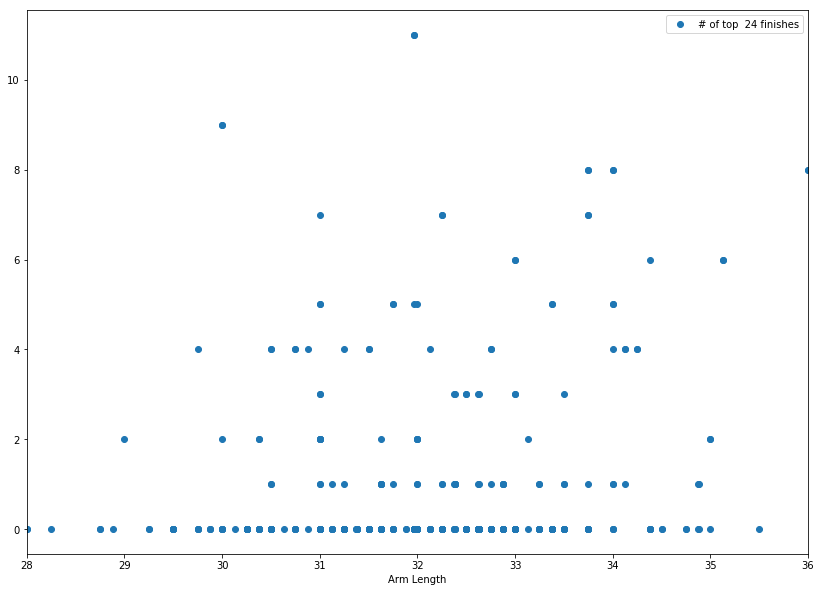

In [26]:
print("Arm Length Correlation: " + str(X['Arm Length'].corr(X["# of top  24 finishes"])))
X.plot(x='Arm Length', y='# of top  24 finishes', style='o')


Hand Size: 0.17653937438578518


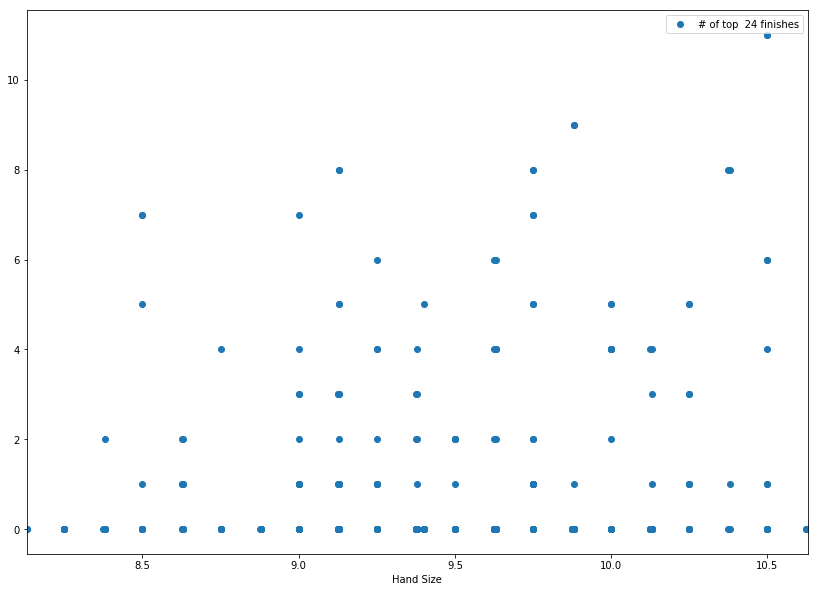

In [23]:
print("Hand Size: " + str(X['Hand Size'].corr(X["# of top  24 finishes"])))
X.plot(x='Hand Size', y='# of top  24 finishes', style='o')

BMI: 0.1366354150616324


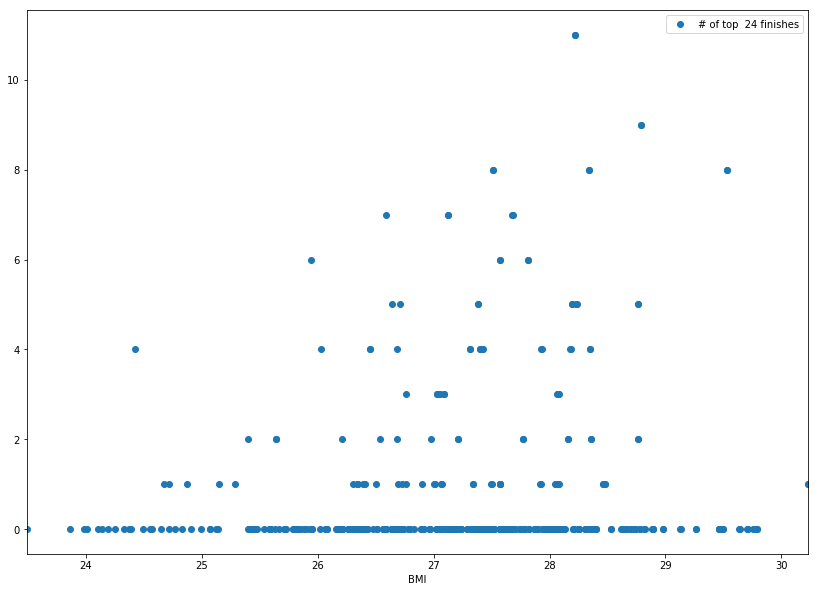

In [24]:
print("BMI: " + str(X['BMI'].corr(X["# of top  24 finishes"])))
X.plot(x='BMI', y='# of top  24 finishes', style='o')

In [12]:


X.drop(X.iloc[:, 0:1], inplace = True, axis = 1)
y = X["# of top  24 finishes"]
y.clip(upper=1, inplace=True)
X['# of top  24 finishes']
X.drop(['# of top  24 finishes', 'DP', 'DR', 'Draft Year', '# of 1000 Rec yards seasons', 'PPG Above conference expectation (Last Year)'], inplace = True, axis=1)

In [4]:
from sklearn.model_selection import train_test_split

seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [5]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [6]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# X_test["# of top  24 finishes"]

In [7]:
# predictions

In [8]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.42%


In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# k-fold cross validation evaluation of xgboost model
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 88.12% (5.44%)


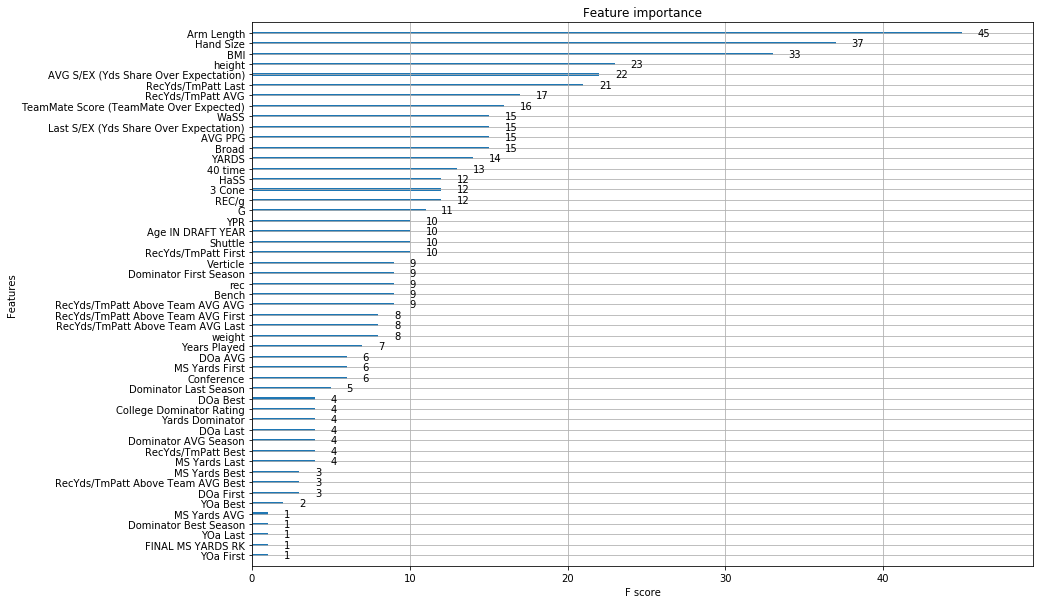

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from google.colab import files

plt.rcParams["figure.figsize"] = (14, 10)

# plot feature importance
ax = xgb.plot_importance(model)
ax.figure.savefig('feature_importance.png')

plt.show()

files.download("feature_importance.png") 
